### This Step ensures the input data (the tweet and Māori words from RMT corpus) is pre-processed to the specifications for using Token-level and Tweet-level Hybrid Architechture.

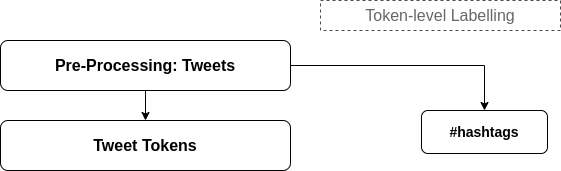

In [1]:
import pandas as pd
import string
import re
import pickle
from emot.emo_unicode import UNICODE_EMOJI
from utilities import Convert, remove_punc, remove_emoticons, strip_all_entities, save_hashtags
import string

### load most common contractions. 
  
# reading the data from the file
with open('contraction_dic.txt', 'rb') as handle:
    data = handle.read()

dic_contractions = pickle.loads(data)

In [2]:
df = pd.read_csv("data/sample_tweets.csv",sep='\t')
df.head()

,tweet_id,user_id,modified_text,maori_words_rmt
0,1001,x10,Living by the Moon: Te Maramataka a Te Whānau-...,"['te', 'maramataka', 'te', 'wiremu', 'tāwhai',..."
1,1002,x11,"Ahakoa he iti, he iti pounamu tonu! Just quiet...","['ahakoa', 'he', 'iti', 'he', 'iti', 'pounamu'..."
2,1003,x12,Mā UFB ka rapu tāne ahau mo ia rā Valentines #...,"['mā', 'ka', 'rapu', 'tāne', 'ahau', 'mo', 'ia..."
3,1004,x13,Our beautiful punga @ Aro Valley <link>,"['punga', 'aro']"
4,1005,x14,#TeKaea tommorow Maori Television Online speci...,"['tekaea', 'maori', 'ikaroarawhiti']"


In [3]:
## make sure any known multi-lingual users are removed. For this research tweets are removed if the tweet contains other languages except English or Maori.  
a = ['xxxx\'']
df = df[~df.user_id.isin(a)]

In [4]:
## ensure all repeat tweets are removed
df = df[~df.modified_text.str.startswith('rt')]
df = df[~df.modified_text.str.startswith('RT')]


In [5]:
new_token = []
hasht = []

for ind, row in df.iterrows():
    new_text = row['modified_text'].replace("<link>", "")
    new_text = new_text.lower()### this is mainly so that it match with RMT corpus
    new_text1 = new_text.replace("<user>", "")
    dd = dic_contractions
    res = ' '.join([dd.get(i, i) for i in new_text1.split()])
    res1 = strip_all_entities(res)
    hashtags = save_hashtags(res)
    tweet = remove_emoticons(res1)
    tweet = tweet.replace("...",' ')
    tweet = tweet.replace("<3",' ')
    tweet = tweet.replace(":-X",' ')
    tweet = tweet.replace(":-(|)",' ')
    tweet1 = remove_punc(tweet)
    twt1 = ' '.join([dd.get(i, i) for i in tweet1.split()])
    twt1 = ''.join([c for c in twt1 if not c.isdigit()])
    twt1 = twt1.strip().replace('\d+','').split()
    new_token.append(twt1)
    hasht.append(hashtags)

df['tokens'] = new_token
df['hashtags'] = hasht
df


,tweet_id,user_id,modified_text,maori_words_rmt,tokens,hashtags
0,1001,x10,Living by the Moon: Te Maramataka a Te Whānau-...,"['te', 'maramataka', 'te', 'wiremu', 'tāwhai',...","[living, by, the, moon, te, maramataka, a, te,...",[]
1,1002,x11,"Ahakoa he iti, he iti pounamu tonu! Just quiet...","['ahakoa', 'he', 'iti', 'he', 'iti', 'pounamu'...","[ahakoa, he, iti, he, iti, pounamu, tonu, just...","[#tereo, #kiatika, #kiarere, #kiamāori]"
2,1003,x12,Mā UFB ka rapu tāne ahau mo ia rā Valentines #...,"['mā', 'ka', 'rapu', 'tāne', 'ahau', 'mo', 'ia...","[mā, ufb, ka, rapu, tāne, ahau, mo, ia, rā, va...","[#gigatowngis, #tweetaz, #rvbw]"
3,1004,x13,Our beautiful punga @ Aro Valley <link>,"['punga', 'aro']","[our, beautiful, punga, aro, valley]",[]
4,1005,x14,#TeKaea tommorow Maori Television Online speci...,"['tekaea', 'maori', 'ikaroarawhiti']","[tommorow, maori, television, online, special,...","[#tekaea, #ikaroarawhiti]"
5,1006,x15,<user> <user> too māori for pākehā bt too pāke...,"['māori', 'pākehā', 'pākehā', 'māori']","[too, māori, for, pākehā, bt, too, pākehā, for...",[]
6,1007,x16,<user> <user> <user> <user> <user> Tomato pure...,"['tomato', 'pure']","[tomato, pure, i, mean]",[]
7,1008,x17,<user> really touching story tonite with Hoani...,"['tonite', 'hoani', 'tino', 'pai']","[really, touching, story, tonite, with, hoani,...",[]
8,1009,x18,Ohhhh he's tooo cute!! Manukura Little White K...,"['tooo', 'manukura', 'kiwi']","[ohhhh, he, is, tooo, cute, manukura, little, ...",[]
9,1010,x19,smashed those sausage rolls at morning tea. #N...,"['tea', 'ngakaipai', 'hangiapopo']","[smashed, those, sausage, rolls, at, morning, ...","[#ngakaipai, #hangiapopo]"


In [7]:
df.to_csv("data/data_after_preprocessing.csv",index=False)